### PROGRAMMING ASSIGNMENT
---

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

## Overview of the Sales Transactions Dataset

### Dataset Description
Dataset Utilized: https://archive.ics.uci.edu/dataset/292/wholesale+customers

This dataset comprises weekly sales transaction data for various products over a year. Each row represents a unique product, and each column contains sales figures for one of the 52 weeks, labeled from `W0` to `W51`. The dataset also includes normalized sales data for each week, providing a standardized measure of sales volumes relative to each product's maximum sales.

### Columns
- **Product_Code**: A unique identifier for each product.
- **W0 to W51**: Sales figures for each product from week 0 to week 51.
- **Normalized 0 to Normalized 51**: Normalized sales data from week 0 to week 51, scaled between 0 and 1 based on the maximum sales of each product.

### Purpose
The dataset is used to analyze sales patterns, forecast demand, and optimize inventory management. It serves as a fundamental resource for understanding product performance across different periods and planning marketing strategies accordingly.

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')  # Replace 'filename.csv' with the actual name of your CSV file

# Display the DataFrame
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


## Data Exploration

**TASK: Create a correlation heatmap.**

### Loading data and creating target variable

We start by loading the sales transactions dataset. Then, we create a target variable called Total_Normalized_Sales by summing all normalized weekly sales data. This target will help in understanding the overall sales performance per product.

In [9]:
import pandas as pd

# Load the dataset
file_path = 'Sales_Transactions_Dataset_Weekly.csv'
data = pd.read_csv(file_path)

# Create a new target variable by summing up all normalized weekly sales
data['Total_Normalized_Sales'] = data.filter(regex='Normalized').sum(axis=1)

### Correlation Analysis

To understand the relationship between weekly sales data and the total normalized sales, we compute a correlation matrix and visualize it using a heatmap. This visualization helps in identifying which weeks are most correlated with the total sales, guiding future analysis and feature selection.

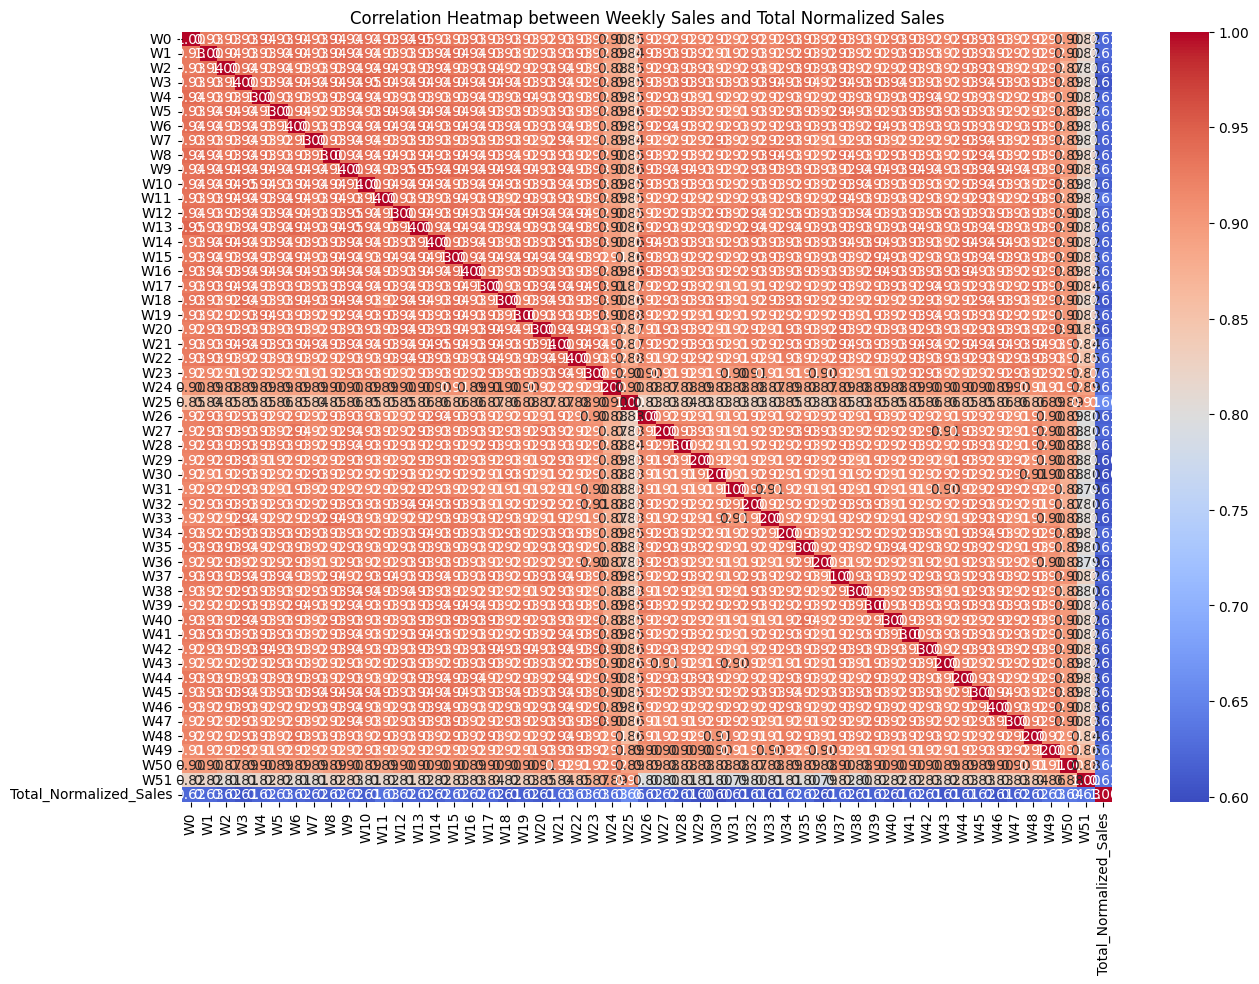

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.filter(regex='^W[0-9]+$', axis=1).join(data['Total_Normalized_Sales']).corr()

# Generate a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Weekly Sales and Total Normalized Sales')
plt.show()


The correlation heatmap visualizes the relationships between weekly sales (W0 to W51) and the Total_Normalized_Sales. Weeks with higher correlation values (closer to 1 or -1) indicate a stronger relationship with the total sales across all weeks. 

From the heatmap, we identified that sales in specific weeks like W25, W50, W49, W11, and W51 are highly correlated with the total normalized sales, suggesting these weeks may be particularly significant in the overall sales cycle of products. Such weeks could represent peak sales periods or times when specific marketing efforts or seasonal factors impact sales significantly.

In [16]:
from sklearn.model_selection import train_test_split

# Define features and target
features = data.filter(regex='^W[0-9]+$')
target = data['Total_Normalized_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10, random_state=42)

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [17]:
# Print the size of each set
print("Training set features shape:", X_train.shape)
print("Testing set features shape:", X_test.shape)
print("Training set target shape:", y_train.shape)
print("Testing set target shape:", y_test.shape)


Training set features shape: (729, 52)
Testing set features shape: (82, 52)
Training set target shape: (729,)
Testing set target shape: (82,)


Training set: Comprises 729 samples, which is 90% of the data, ensuring a substantial amount of data for training the model.

Testing set: Consists of 82 samples, accounting for 10% of the data, reserved for validating the model’s performance on unseen data.

This split helps in training the model on a large portion of the data while keeping a separate portion to assess the model's generalization capabilities.

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Setup the pipeline with StandardScaler and KNN Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Parameters of the KNN to tune
parameters = {'knn__n_neighbors': range(1, 31)}

# Setup the grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [19]:
# Print the best parameters and best score from the grid search
print("Best parameters found:", best_params)
print("Best score (negative mean squared error):", best_score)


Best parameters found: {'knn__n_neighbors': 10}
Best score (negative mean squared error): -10.071109623079828


### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 6.551508999999998
R^2 Score: 0.892884230114587
